In [1]:
!pip install tensorflow
!pip install tensorboard

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

In [3]:
# Створюємо синтетичкий датасет з зображеннями та мітками
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# Задаємо TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [5]:
# Створюємо згорткову нейронну мережу (CNN)
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
# Компілюємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Вивчаємо модель з використанням TensorBoard
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1448 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0481 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0253 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0194 - accuracy: 0.9938


In [8]:
# Оцінюємо модель
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f"Точність на тестових даних: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9886
Точність на тестових даних: 0.9886000156402588


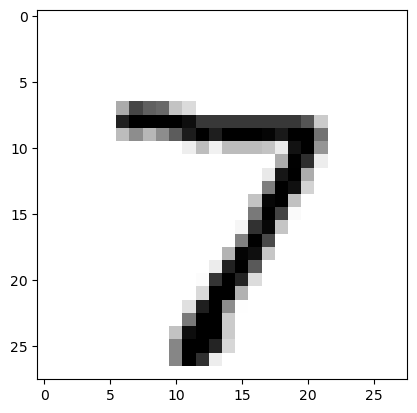

In [9]:
# Візуалізація результатів
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()